# MÜŞTERİ SEGMENTASYONU PROJESİ


### K-MEANS

k-means, bir veri kümesini kümeleme veya gruplama yöntemi olarak kullanılan bir makine öğrenimi algoritmasıdır. Veri noktalarını belirli bir sayıda küme veya grup içinde düzenler. Her bir küme, benzer özelliklere sahip veri noktalarını içerirken, farklı kümeleme arasındaki benzerlik minimizasyonu hedeflenir.

Algoritma, veri noktalarını rastgele başlangıç merkezleriyle başlatır ve ardından veri noktalarının kümelere atanması ve merkezlerin güncellenmesi adımlarını tekrarlar. Kümeleme, her veri noktasının en yakın merkeze atanmasıyla gerçekleştirilir. Bu aşamada, noktaların uzaklık hesaplaması genellikle Euclidean mesafesi kullanılarak yapılır.

K-means algoritması, iki aşamalı bir süreç olarak çalışır:

`Atama Aşaması:` Rastgele seçilen merkezleri kullanarak, her veri noktasını en yakın merkeze atar ve böylece veri noktalarını kümelerine ayırır.


`Güncelleme Aşaması:` Her kümenin yeni merkezi, o küme içindeki veri noktalarının ortalaması olarak hesaplanır. Bu yeni merkezler, bir sonraki atama aşamasında kullanılmak üzere güncellenir.


K-means algoritması, veri noktalarının küme sayısının önceden belirlenmesini gerektirir. Bu nedenle, başlangıçta küme sayısı hakkında bir tahmin veya anlayış gereklidir. Algoritma, kümeleme işlemi sonuçları istikrarlı hale gelene kadar atama ve güncelleme aşamalarını tekrarlar.

K-means algoritması, basit uygulanabilirliği ve etkili sonuçlar üretme kabiliyeti nedeniyle sıklıkla kullanılan bir kümeleme yöntemidir. Ancak, algoritma, veri noktalarının çeşitli şekillerde dağılmış olması veya aykırı verilerin olması gibi durumlarda bazı sorunlarla karşılaşabilir. Ayrıca, başlangıç merkezlerinin seçimine bağımlı olarak sonuçlar farklı olabilir.

In [2]:
import numpy
import os

os.environ["OMP_NUM_THREADS"] = "1"


#Bu kod parçası, OpenMP kütüphanesini kullanarak çoklu iş parçacığı (multi-threading) desteğini etkisiz hale getiriyor. os.environ sözlüğü aracılığıyla OMP_NUM_THREADS ortam değişkenine "1" değeri atanıyor. Bu, OpenMP kütüphanesinin sadece tek bir iş parçacığı kullanmasını sağlıyor.

#Bu tür bir ayarlamaya ihtiyaç duyulabilir çünkü bazı durumlarda, çoklu iş parçacığı kullanımı performansı olumsuz etkileyebilir veya programın istikrarını bozabilir. Özellikle bazı çoklu iş parçacığı kullanan kütüphanelerle (örneğin, NumPy) birlikte çalışırken bu tür ayarlamalar yapılabilir.

#Ancak, herhangi bir iş parçacığı ayarlamasının programınızın performansına ve gereksinimlerine bağlı olduğunu unutmayın. Eğer çoklu iş parçacığı kullanımının avantajlarından yararlanmak istiyorsanız, bu satırı kullanmanız gerekmez veya OMP_NUM_THREADS değerini değiştirebilirsiniz.


In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


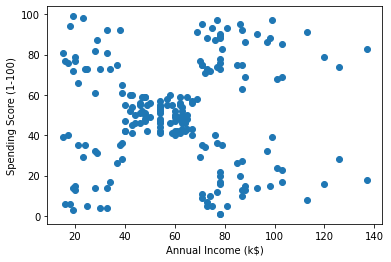

In [4]:
#veri setine göz atalım: 
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [5]:
#sütun isimlerini değiştirme:
df.rename(columns= {'Annual Income (k$)' : 'income'}, inplace=True)
df.rename(columns= {'Spending Score (1-100)' : 'score'}, inplace=True)

### modelimize verileri işlemeden önce mutlaka verilerimizi normalize etmeliyiz.


In [6]:
#normalizasyon için sklearn kütüphanesinden MİnMaxScaler() fonksiyonunu kullanacağız.

scaler = MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()

,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [7]:
df.tail()

,CustomerID,income,score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


Elbow(dirsek) yöntemi kullanılarak K değerini buluyoruz

`inertia_` bir k-means modelinin bir özelliğidir ve modelin kümeleme performansını ölçen bir değerdir. K-means algoritması, her veri noktasını en yakın merkeze atar ve küme içindeki veri noktalarının merkeze olan uzaklıklarını minimize etmeye çalışır.

inertia_ değeri, her bir veri noktasının kümesinin merkezine olan uzaklığının karelerinin toplamını temsil eder. Daha düşük bir inertia_ değeri, daha iyi bir kümeleme performansını gösterir. Yani, kümeleme sonuçlarındaki veri noktalarının merkezlere olan uzaklıkları daha küçük olur.

In [10]:
k_range = range(1,11)

list_dist = []

for k in k_range:
    kmeans_modelim = KMeans(n_clusters=k) #n_clusters parametresiyle küme sayısını belirtiyoruz.
    kmeans_modelim.fit(df[['income', 'score']])
    list_dist.append(kmeans_modelim.inertia_)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff0194ae9d0>
Traceback (most recent call last):
  File "/home/gizem/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/gizem/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/gizem/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/gizem/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

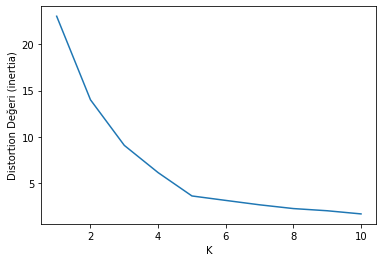

In [11]:
plt.xlabel('K')
plt.ylabel('Distortion Değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

#### en iyi değer = 5

In [12]:
#k = 5 için bir k-means modeli oluşturalım:

kmeans_modelim = KMeans(n_clusters=5)
y_predicted = kmeans_modelim.fit_predict(df[['income', 'score']])
y_predicted

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [13]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,4
1,2,0.000000,0.816327,0
2,3,0.008197,0.051020,4
3,4,0.008197,0.775510,0
4,5,0.016393,0.397959,4


In [14]:
#centroidler:
kmeans_modelim.cluster_centers_

#cluster_centers_, bir k-means modelinin bir özelliğidir ve küme merkezlerini temsil eder. K-means algoritması, veri noktalarını kümelere ayırdıktan sonra, her bir kümenin merkezini hesaplar.

#cluster_centers_ özelliği, bir numpy dizisi olarak döndürülür ve her bir küme merkezinin koordinatlarını içerir. Her bir merkez, kümeye ait veri noktalarının ortalaması olarak hesaplanır.



array([[0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

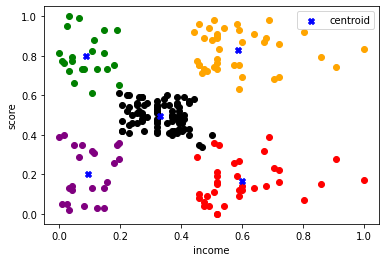

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]

plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df1['income'], df1['score'], color='green')
plt.scatter(df2['income'], df2['score'], color='red')
plt.scatter(df3['income'], df3['score'], color='black')
plt.scatter(df4['income'], df4['score'], color='orange')
plt.scatter(df5['income'], df5['score'], color='purple')

#kmeans._modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütunlarını kmeans_modelim.cluster_centers_[:,0] 
#ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için ayarlıyoruz

plt.scatter(kmeans_modelim.cluster_centers_[:,0], kmeans_modelim.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.legend() # küme merkezleri ve veri noktaları için bir açıklama oluşturuyoruz.
plt.show()

